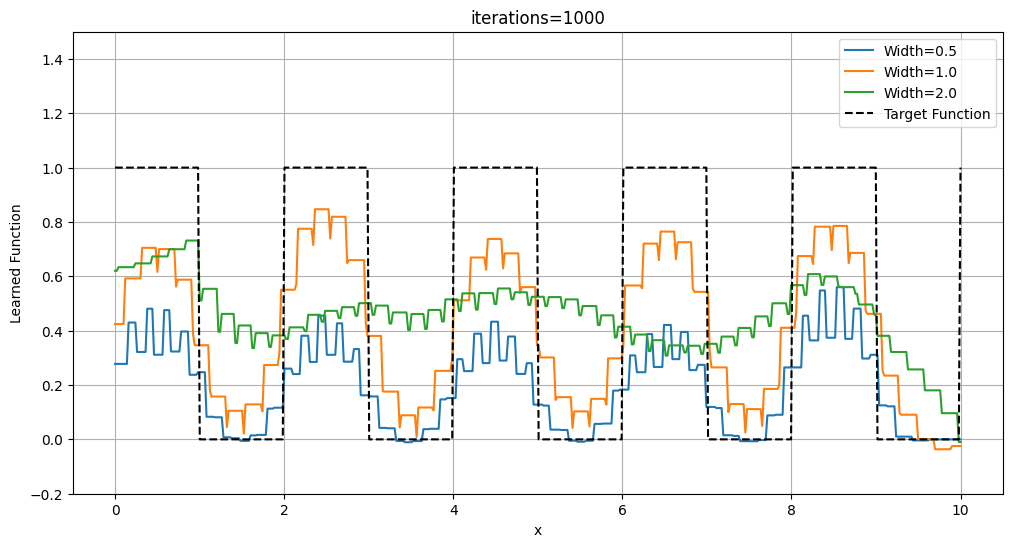

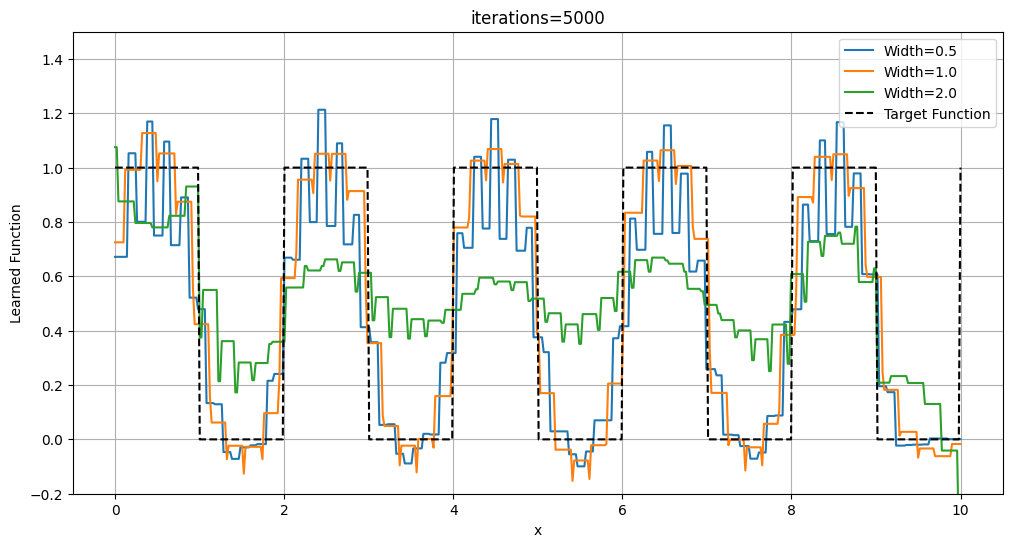

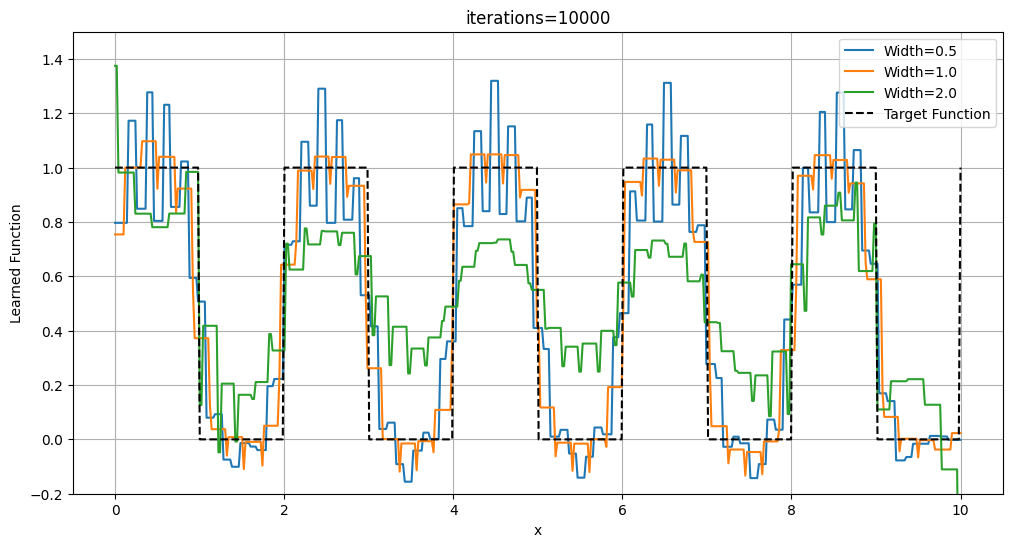

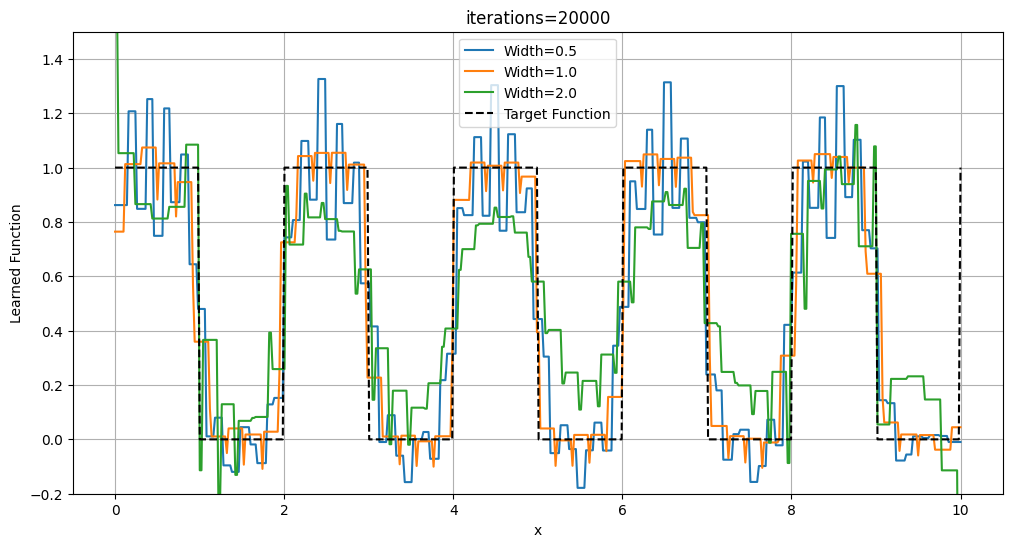

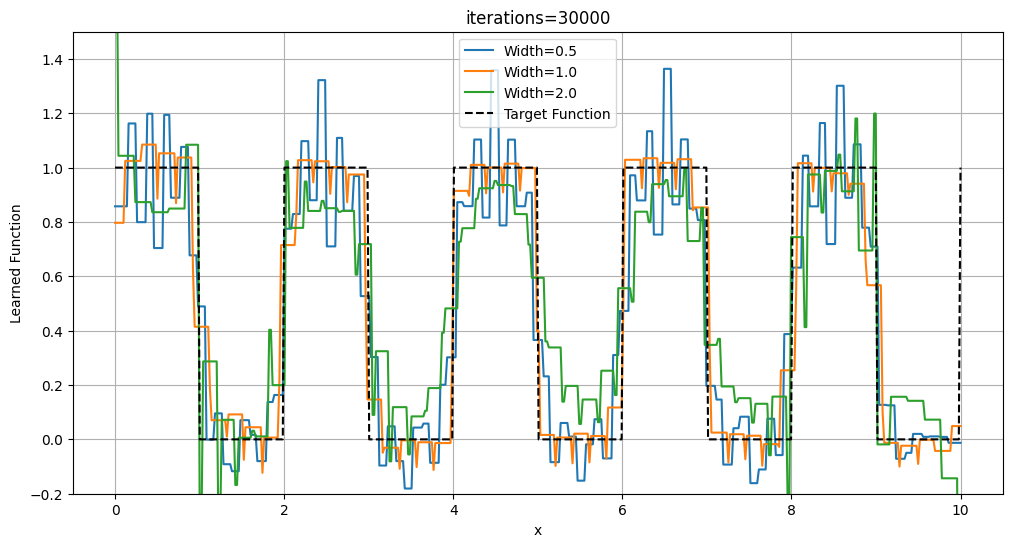

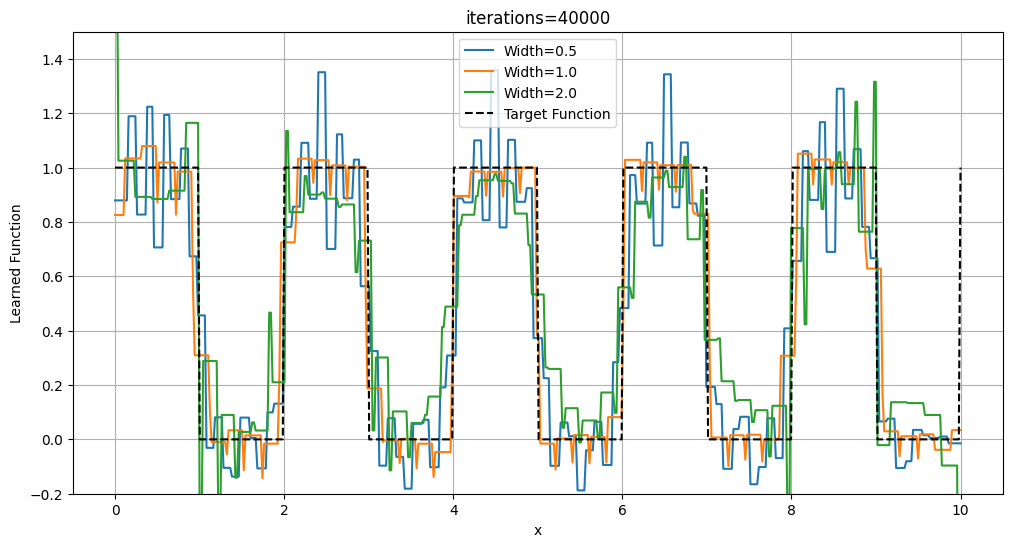

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 矩形波関数を定義（目標関数）
def square_wave_function(x):
    return 1.0 if int(x) % 2 == 0 else 0.0

# 粗い符号化の特徴を生成
def create_features(x, centers, width):
    return np.array([1.0 if abs(x - c) < width / 2 else 0.0 for c in centers])

# 線形関数近似の学習
def train_square_wave(centers, width, alpha, num_iterations):
    weights = np.zeros(len(centers))  # 重みを初期化
    for _ in range(num_iterations):
        # ランダムに学習データを生成
        x = np.random.uniform(0, 10)  # [0, 10]の範囲
        target = square_wave_function(x)  # 目標値
        features = create_features(x, centers, width)  # 特徴
        prediction = np.dot(weights, features)  # 予測値
        error = target - prediction  # 誤差
        weights += alpha * error * features  # 勾配降下で重みを更新
    return weights

# 関数をプロット
def plot_results(centers, width, weights, title):
    xs = np.linspace(0, 10, 500)
    ys = [np.dot(weights, create_features(x, centers, width)) for x in xs]
    plt.plot(xs, ys, label=f"Width={width}")
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("Learned Function")
    plt.grid(True)

# パラメータ設定
centers = np.linspace(0, 10, 50)  # 特徴の中心点（50個）
widths = [0.5, 1.0, 2.0]  # 特徴の幅
alpha = 0.2 / len(centers)  # ステップサイズ
num_iterations = [1000,5000,10000,20000,30000,40000]  # 学習回数

for num_iteration in num_iterations:

    # 学習と結果のプロット
    plt.figure(figsize=(12, 6))
    for width in widths:
        weights = train_square_wave(centers, width, alpha, num_iteration)
        plot_results(centers, width, weights, "Effect of Feature Width on Learning")

    # 目標関数もプロット
    xs = np.linspace(0, 10, 500)
    ys_target = [square_wave_function(x) for x in xs]
    plt.plot(xs, ys_target, label="Target Function", linestyle="--", color="black")
    plt.ylim(-0.2,1.5)
    plt.title(f"iterations={num_iteration}")
    plt.legend()
    plt.show()






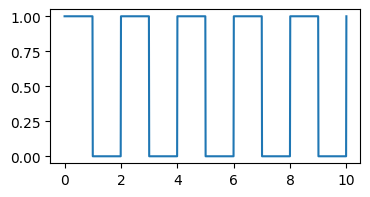

In [5]:
x = np.linspace(0, 10, 1000)
y = [square_wave_function(x_) for x_ in x]
plt.figure(figsize=(4, 2))
plt.plot(x, y)